LINEAR REGRESSION MACHINE LEARNING MODEL

This programme is to visualise the HOUSE_PRICING data set and run a linear regression model for predicting the house prices.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [70]:
df = pd.read_csv('Housing.csv')


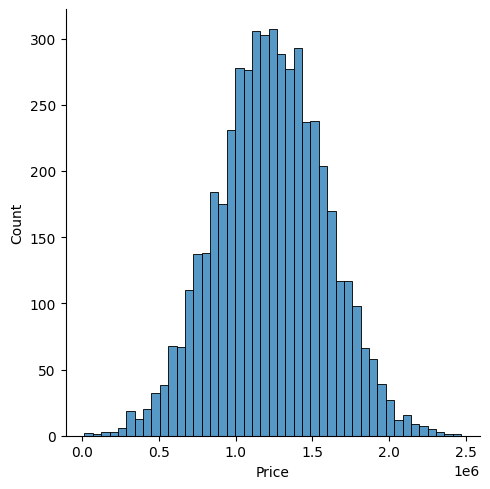

In [71]:
sns.displot(df['Price'])

<ipython-input-72-55e34c10892a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True


<Axes: >

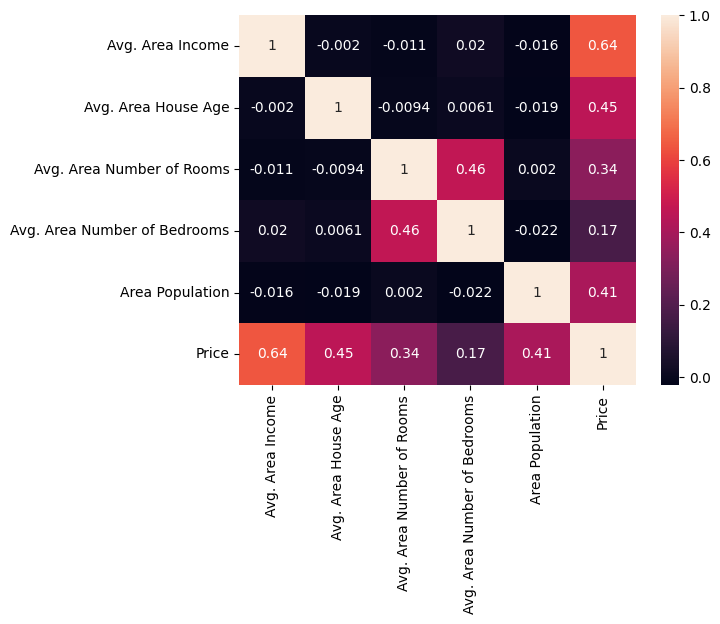

In [72]:
sns.heatmap(df.corr(),annot = True
           )

#this corr map is used to find the correlation between the attributes and the pricing so as to 
#get an idea about the relationship between them.

In [73]:
df.columns 


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [74]:
x = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms','Area Population']]
#separate the other attributes from the predicting attribute

In [75]:
y = df[['Price']]
#separte the predicting attribute into Y for model training 

In [76]:
from sklearn.model_selection import train_test_split

#import model selection train test split for splitting the data into test and train for 
#model validation.

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lm = LinearRegression()
#loading the model constructor

In [80]:
lm.fit(x_train,y_train)
#training or fitting the train data into the model

LinearRegression()

In [81]:
print(lm.intercept_)

[-2640159.7968527]


In [82]:
lm.coef_
#examining the co-efficients of the fitted model.

array([[2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
        1.51504200e+01]])

In [83]:
x_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [84]:
cdf = pd.DataFrame(data=lm.coef_.reshape(5,1),index=x_train.columns,columns=['Coeff'])

In [85]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [86]:
predictions = lm.predict(x_test)

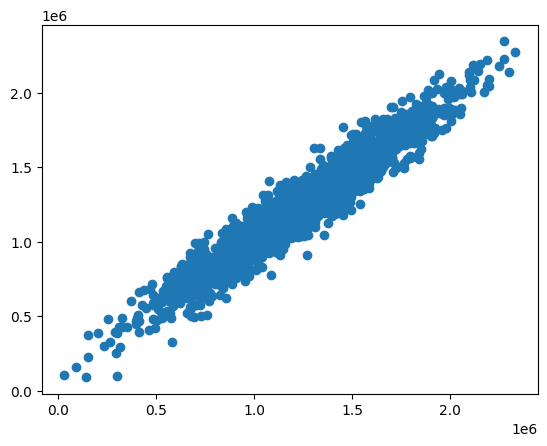

In [87]:
plt.scatter(y_test,predictions)
#to visualise the predictions and the test Y !! almost it is forming a linear line with less deviation

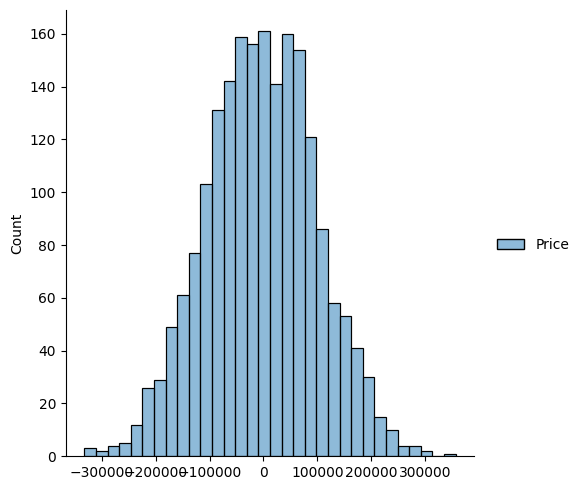

In [88]:
sns.displot((y_test-predictions))

In [89]:
from sklearn import metrics

In [90]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914942
MSE: 10460958907.208977
RMSE: 102278.82922290897
